In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter

%matplotlib inline

# pd.set_option('display.max_rows', None)

In [7]:
ref_df = pd.read_csv("../data/UNdata_refugees.csv", skipfooter=3, engine='python')
ref_df = ref_df[["Country or territory of asylum or residence", "Country or territory of origin", 
                      "Year", "Refugees<sup>*</sup>"]]
ref_df = ref_df.rename({"Country or territory of asylum or residence": "asylum", 
                        "Country or territory of origin": "origin", "Refugees<sup>*</sup>": "refugees"}, axis="columns")
ref_df["Year"] = ref_df["Year"].astype(int)
ref_df = ref_df.dropna() # There are 198 rows with refugees as NA
ref_df["refugees"] = ref_df["refugees"].astype(int)

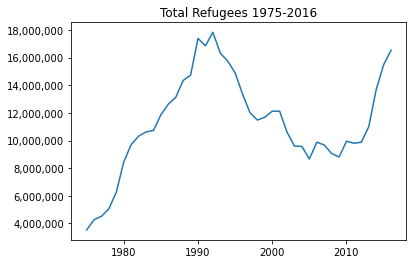

In [8]:
plt.plot(ref_df.groupby("Year").sum())
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title("Total Refugees 1975-2016")
print()

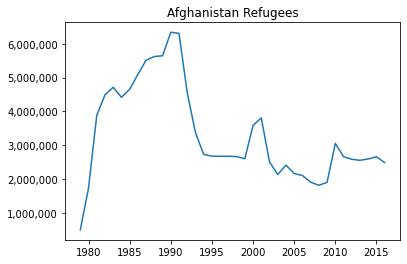

In [9]:
plt.plot(ref_df[ref_df["origin"] == "Afghanistan"].groupby("Year").sum()["refugees"])
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title("Afghanistan Refugees")
print()

In [10]:
afghan_pop_df = pd.read_csv("../data/UNdata_population.csv", on_bad_lines='warn', skipfooter=4, engine='python')
plt.plot(afghan_pop_df[(afghan_pop_df["Sex"] == "Both Sexes") & (afghan_pop_df["Area"] == "Total")]["Year"], 
         afghan_pop_df[(afghan_pop_df["Sex"] == "Both Sexes") & (afghan_pop_df["Area"] == "Total")]["Value"])

TypeError: read_csv() got an unexpected keyword argument 'on_bad_lines'

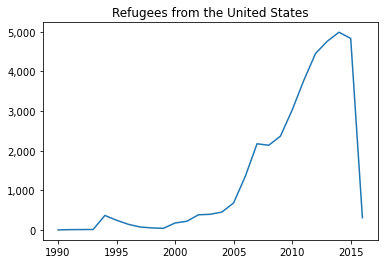

In [11]:
plt.plot(ref_df[ref_df["origin"] == "United States"].groupby("Year").sum())
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title("Refugees from the United States")
print()

In [12]:
# Where did the refugees from the United States in 2015 go?
ref_df[(ref_df["origin"] == "United States") & (ref_df["Year"] == 2015)]

,asylum,origin,Year,refugees
5537,Argentina,United States,2015,4
5673,Australia,United States,2015,15
5778,Austria,United States,2015,1
6072,Brazil,United States,2015,1
6346,Canada,United States,2015,4573
6891,Ecuador,United States,2015,6
7220,France,United States,2015,1
7427,Germany,United States,2015,159
7673,Hungary,United States,2015,2
8535,Mexico,United States,2015,1


In [13]:
# Just one of those interesting little facts in the data.
ref_df[ref_df["origin"] ==  "Holy See (the)"]

,asylum,origin,Year,refugees
58446,Germany,Holy See (the),2004,2


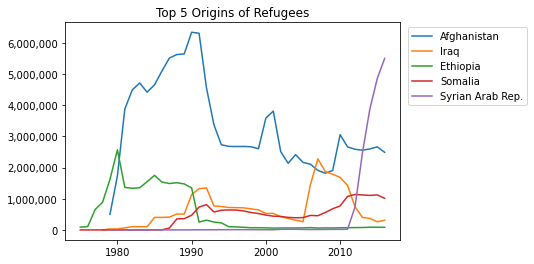

In [14]:
origin_lst = ref_df.groupby("origin").sum().sort_values("refugees", ascending = False).index.tolist()
del origin_lst[1] # remove 'Various'
for x in origin_lst[:5]:
    plt.plot(ref_df[ref_df["origin"] == x].groupby("Year").sum()["refugees"],
             label=x)
#plt.gca().legend()
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title("Top 5 Origins of Refugees")
print()

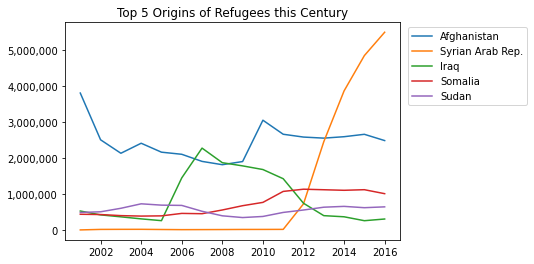

In [15]:
this_cent_df = ref_df[ref_df["Year"] > 2000]
origin_lst = this_cent_df.groupby("origin").sum().sort_values("refugees", ascending = False).index.tolist()
for x in origin_lst[:5]:
    plt.plot(this_cent_df[this_cent_df["origin"] == x].groupby("Year").sum()["refugees"],
             label=x)
#plt.gca().legend()
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title("Top 5 Origins of Refugees this Century")
print()

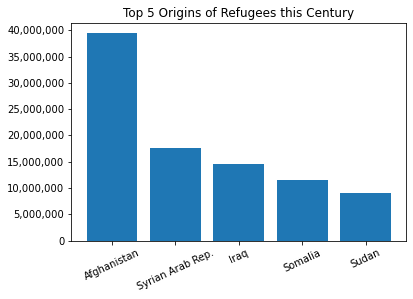

In [16]:
plt.bar(origin_lst[:5], this_cent_df.groupby("origin").sum()\
        .sort_values("refugees", ascending = False)["refugees"][:5].tolist())
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=25)
plt.title("Top 5 Origins of Refugees this Century")
print()